In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
sp.init_printing()

In [32]:
sx = sp.Symbol('x', real = True)
sk = sp.Symbol('k')
spsi = sp.Function('psi')
sn = sp.Symbol('n', integer = True, nonzero = True, positive = True)
sA = sp.Symbol('A')
sh = sp.Symbol('hbar', real = True, positive = True)
sa = sp.Symbol('a', real = True, positive = True)
sx, sk, spsi

(x, k, psi)

In [3]:
-sk**2*spsi(sx)

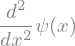

In [4]:
spsi(sx).diff(sx, sx)

In [5]:
(-sk**2).diff(sk)

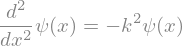

In [6]:
eq = sp.Eq(spsi(sx).diff(sx, sx), -sk**2*spsi(sx))
eq

In [7]:
sp.dsolve(eq, spsi(sx))

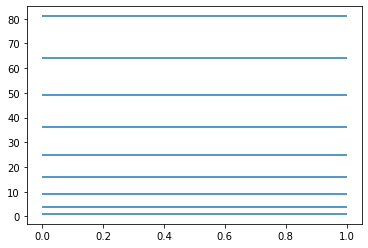

In [8]:
plt.hlines([n**2 for n in range(1, 10)], 0, 1)

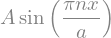

In [28]:
psin = sA * sp.sin(sn * sp.pi * sx / sa)
psin

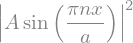

In [20]:
sp.Abs(psin)**2

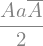

In [29]:
sp.integrate(psin * psin.conjugate(), (sx, 0, sa))

In [4]:
def En(n, h = 1, m = 1, a = 1):
    return n**2 * h**2 * np.pi**2 / (2 * m * a**2)

In [5]:
def psin(x, t, n, h = 1, m = 1, a = 1):
    return np.sqrt(2 / a) * np.sin(n * np.pi * x / a) * np.exp(-1.j * En(n, h, m, a) * t / h)

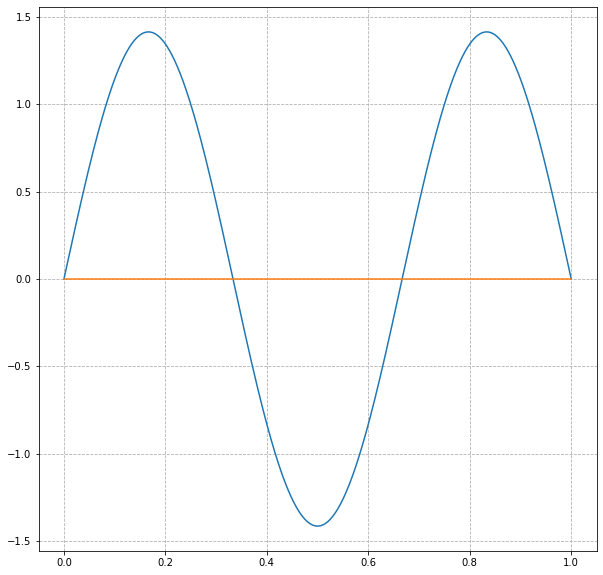

In [57]:
xs = np.linspace(0, 1, 1000)
fig = plt.figure(figsize = (10, 10))
plt.grid(ls = '--')
t = 0
n = 3
plt.plot(xs, psin(xs, t, n).real)
plt.plot(xs, psin(xs, t, n).imag)

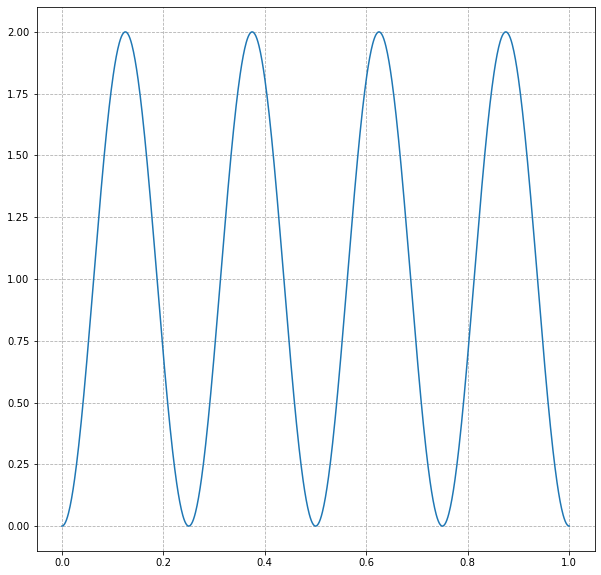

In [60]:
xs = np.linspace(0, 1, 1000)
fig = plt.figure(figsize = (10, 10))
plt.grid(ls = '--')
t = 0
n = 4
plt.plot(xs, np.abs(psin(xs, t, n))**2)

In [3]:
xs = np.linspace(0, 1, 1000)
fig = plt.figure(figsize = (10, 10))
plt.grid(ls = '--')
t = 0
n = 3

plt.xlim(0, 1)
plt.ylim(-2, 2)

fps = 30
tmax = 10

alpha = 5

dt = 0.001


line1, = plt.plot([], [])
line2, = plt.plot([], [])

plt.close()

def anim(i):
    line1.set_data(xs, psin(xs, i * dt, n).real)
    line2.set_data(xs, psin(xs, i * dt, n).imag)
    return line1, line2

res = animation.FuncAnimation(fig, anim, 500, blit = True, interval = 20)
HTML(res.to_html5_video())

NameError: name 'psin' is not defined

In [25]:
xs = np.linspace(0, 1, 1000)
fig = plt.figure(figsize = (10, 10))
plt.grid(ls = '--')
t = 0
n = 1

plt.xlim(0, 1)
plt.ylim(-2, 2)

fps = 30
tmax = 10

alpha = 5

dt = 0.001


line1, = plt.plot([], [])

plt.close()

def anim(i):
    line1.set_data(xs, np.abs(psin(xs, i * dt, n))**2)
    return line1,

res = animation.FuncAnimation(fig, anim, 500, blit = True, interval = 20)
HTML(res.to_html5_video())

In [6]:
def Psi(n, x, t, a = 1.0, h = 1.0, m = 1.0):
    return np.sqrt(2.0 / a) * np.sin(n * np.pi * x / a) * np.exp(-1j * n**2 * np.pi**2 * h / (2 * m * a**2) * t)

In [7]:
def PsiSum(x, t, cn):
    ys = np.zeros_like(x, dtype = np.complex128)
    norm = np.sqrt(np.sum(np.abs(np.array([*cn.values()]))**2))
    for k, v in cn.items():
        ys += v * Psi(k, x, t) / norm
    return ys

In [8]:
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (0, 6))
line1, = ax.plot([], [], lw = 2)
dt = 0.001
plt.close()

xs = np.linspace(0, 1, 100)
def animate(i):
    line1.set_data(xs, np.abs(PsiSum(xs, dt * i, {1:1, 2:1, 3:1, 4:1, 5:1, 6:1}))**2)
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

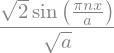

In [33]:
ppsin = sp.sqrt(2 / sa) * sp.sin(sn * sp.pi * sx / sa)
ppsin

In [34]:
ax = sp.integrate(sx * ppsin * ppsin.conjugate(), (sx, 0, sa)).simplify()
ax

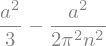

In [35]:
ax2 = sp.integrate(sx**2 * ppsin * ppsin.conjugate(), (sx, 0, sa)).simplify()
ax2

In [36]:
ap = sp.integrate(ppsin.conjugate() * ppsin.diff(sx), (sx, 0, sa)).simplify()
ap

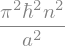

In [37]:
ap2 = -sh**2 * sp.integrate(ppsin.conjugate() * ppsin.diff(sx, sx), (sx, 0, sa)).simplify()
ap2

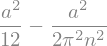

In [38]:
vx = ax2 - ax**2
vx

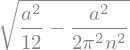

In [39]:
sdx = sp.sqrt(vx)
sdx

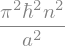

In [40]:
vp = ap2 - ap**2
vp

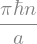

In [41]:
sdp = sp.sqrt(vp)
sdp

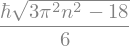

In [43]:
(sdx * sdp).simplify()